In [15]:
def phitometers(phi):
    return phi/360 * 1064e-9
def meterstophi(meters):
    return meters/1064e-9 * 360

In [1]:
from pykat import finesse        # import the whole pykat.finesse package
from pykat.commands import *     # import all packages in pykat.commands
import numpy as np               # for basic math/sci/array functions
import matplotlib.pyplot as plt  # for plotting
import inspect                   # for looking at source codes of functions
import pykat.ifo.aligo as aligo

# tell the notebook to automatically show plots inline below each cell
%matplotlib inline               
# use pykat's plotting style. change dpi to change plot sizes on your screen
pykat.init_pykat_plotting(dpi=90)

base = aligo.make_kat()
base.maxtem=4
base = aligo.setup(base,verbose=True)

ULbase = base.deepcopy()
ULbase.removeBlock("locks")

                                              ..-
    PyKat develop         _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat

-- pretuning interferometer to precision 0.001 deg = 2.95556e-12 m
   scanning X arm (maximising power)
   found max/min at: 0 (precision = 0.00030375)
   scanning Y arm (maximising power)
   found max/min at: 0 (precision = 0.00030375)
   scanning MICH (minimising power)
   found max/min at: -0.001 (precision = 0.00010125)
   scanning PRCL (maximising power)
   found max/min at: 0.007 (precision = 0.00030375)
   scanning SRCL (maximising carrier power, then adding 90 deg)
   found max/min at: -90.056 (precision = 0.00030375)
   ... done
-- adjusting PRC length
   adusting kat.lp1.L by -0.0

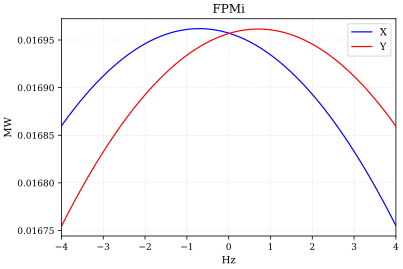

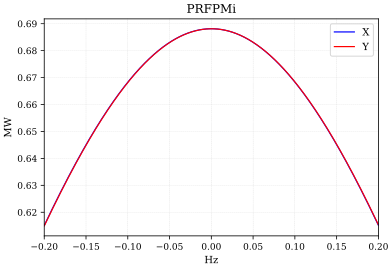

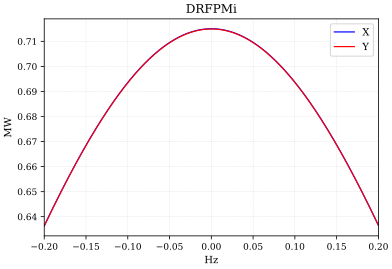

In [9]:
def Fscan(kat,title,frange):
    kat.parse("xaxis L0 f lin {} {} 1000".format(-frange,frange))
    kat.IFO.POW_X.add_signal()
    kat.IFO.POW_Y.add_signal()
    o=kat.run()
    plt.figure()
    plt.title(title)
    plt.plot(o.x,o[kat.IFO.POW_X.name]/1e6,label='X')
    plt.plot(o.x,o[kat.IFO.POW_Y.name]/1e6,label='Y')
    plt.ylabel('MW')
    plt.xlabel('Hz')
    plt.legend()
    
kat = ULbase.deepcopy()
kat.SRM.setRTL(0,1,0)
kat.PRM.setRTL(0,1,0)
Fscan(kat,'FPMi',4)

kat = ULbase.deepcopy()
kat.SRM.setRTL(0,1,0)
Fscan(kat,'PRFPMi',0.2)

Fscan(ULbase.deepcopy(),'DRFPMi',0.2)

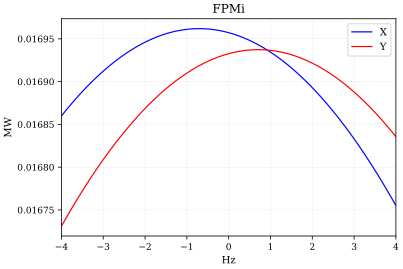

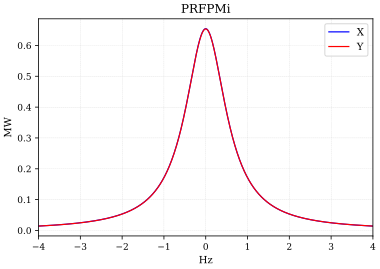

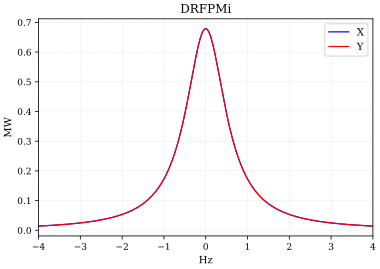

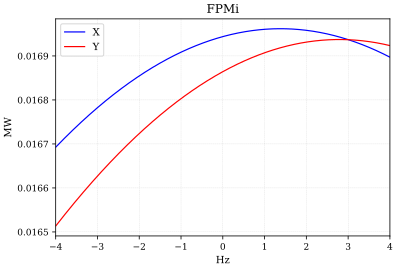

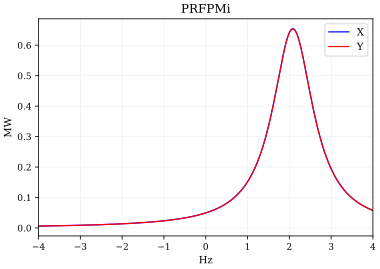

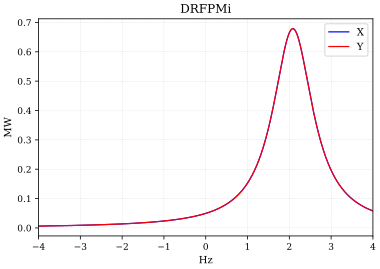

In [43]:
lossyY = ULbase.deepcopy()

lossyY.ITMY.L += 1e-5
# lossyY.ITMY.R -= 1e-6

kat = lossyY.deepcopy()
kat.SRM.setRTL(0,1,0)
kat.PRM.setRTL(0,1,0)
Fscan(kat,'FPMi',4)

kat = lossyY.deepcopy()
kat.SRM.setRTL(0,1,0)
Fscan(kat,'PRFPMi',4)

Fscan(lossyY.deepcopy(),'DRFPMi',4)

CO = 1e-2
lossyY.ETMX.phi +=CO
lossyY.ETMY.phi +=CO

kat = lossyY.deepcopy()
kat.SRM.setRTL(0,1,0)
kat.PRM.setRTL(0,1,0)
Fscan(kat,'FPMi',4)

kat = lossyY.deepcopy()
kat.SRM.setRTL(0,1,0)
Fscan(kat,'PRFPMi',4)

Fscan(lossyY.deepcopy(),'DRFPMi',4)

what if there was a DC offset constantly on CARM?

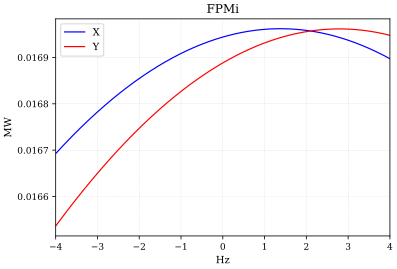

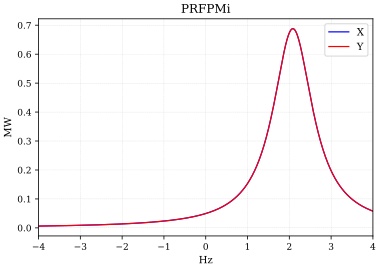

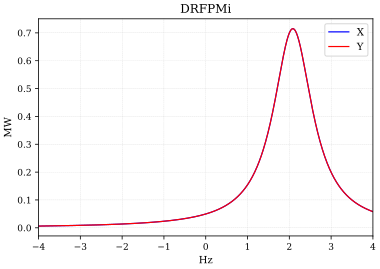

In [24]:
CARMoffbase = ULbase.deepcopy()
CO = 1e-2
CARMoffbase.ETMX.phi +=CO
CARMoffbase.ETMY.phi +=CO

kat = CARMoffbase.deepcopy()
kat.SRM.setRTL(0,1,0)
kat.PRM.setRTL(0,1,0)
Fscan(kat,'FPMi',4)

kat = CARMoffbase.deepcopy()
kat.SRM.setRTL(0,1,0)
Fscan(kat,'PRFPMi',4)

Fscan(CARMoffbase.deepcopy(),'DRFPMi',4)

PRM tuning scan instead

In [25]:
def PRMscan(kat,title,prange):
    kat.parse("xaxis PRM phi lin {} {} 1000".format(-prange,prange))
    kat.IFO.POW_X.add_signal()
    kat.IFO.POW_Y.add_signal()
    o=kat.run()
    plt.figure()
    plt.title(title)
    plt.plot(o.x,o[kat.IFO.POW_X.name]/1e6,label='X')
    plt.plot(o.x,o[kat.IFO.POW_Y.name]/1e6,label='Y')
    plt.ylabel('MW')
    plt.xlabel('deg')
    plt.legend()

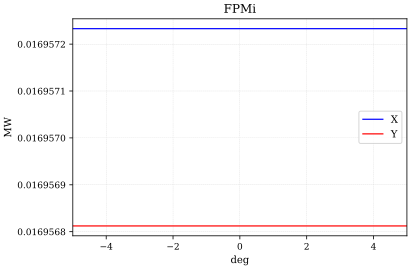

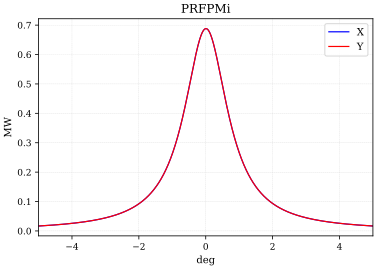

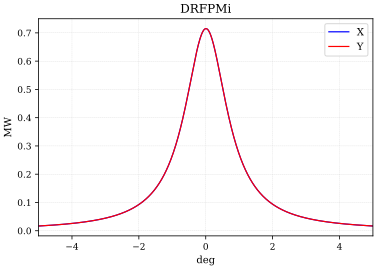

In [31]:
SR=5

CARMoffbase = ULbase.deepcopy()
CO = 0
CARMoffbase.ETMX.phi +=CO
CARMoffbase.ETMY.phi +=CO

kat = CARMoffbase.deepcopy()
kat.SRM.setRTL(0,1,0)
kat.PRM.setRTL(0,1,0)
PRMscan(kat,'FPMi',SR)

kat = CARMoffbase.deepcopy()
kat.SRM.setRTL(0,1,0)
PRMscan(kat,'PRFPMi',SR)

PRMscan(CARMoffbase.deepcopy(),'DRFPMi',SR)

In [23]:
phitometers(CO)

2.955555555555556e-11

In [20]:
meterstophi(3e-12)

0.0010150375939849624

### Compare CARM scan and resulting arm circulating powers when arm losses same or different, with and without recycling

-0.0025415036389935222
1.3880216722987129


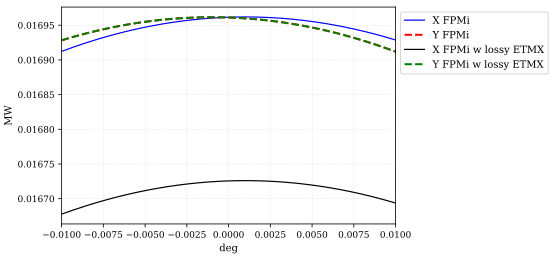

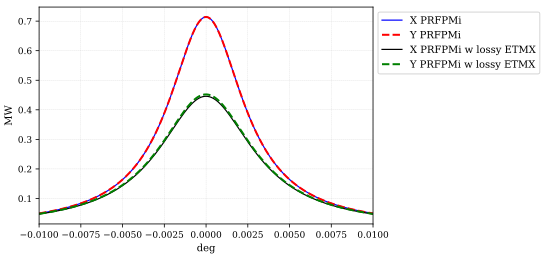

In [78]:
def CARMscan(k,title):
    kat = k.deepcopy()
    kat.IFO.POW_X.add_signal()
    kat.IFO.POW_Y.add_signal()
    o=kat.IFO.CARM.scan(xlimits=[-1e-2,1e-2])
    plt.plot(o.x,o[kat.IFO.POW_X.name]/1e6,label='X {}'.format(title))
    plt.plot(o.x,o[kat.IFO.POW_Y.name]/1e6,label='Y {}'.format(title),ls='--',lw=2)
    plt.ylabel('MW')
    plt.xlabel('deg')
    plt.legend(loc=2,bbox_to_anchor=(1,1))

PRkat = ULbase.deepcopy()
PRkat.SRM.setRTL(0,1,0)

FPkat = PRkat.deepcopy()
FPkat.PRM.setRTL(0,1,0)

lossyPR = PRkat.deepcopy()
lossyPR.ETMX.L += 1e-4

lossyFP = FPkat.deepcopy()
lossyFP.ETMX.L += 1e-4

CARMscan(FPkat,'FPMi')
CARMscan(lossyFP,'FPMi w lossy ETMX')
plt.figure()
CARMscan(PRkat,'PRFPMi')
CARMscan(lossyPR,'PRFPMi w lossy ETMX')

for kk in [PRkat, lossyPR]:
    kk.IFO.POW_X.add_signal()
    kk.IFO.POW_Y.add_signal()
    kk.noxaxis=True
    o=kk.run()
    print((o[kat.IFO.POW_Y.name]-o[kat.IFO.POW_X.name])/o[kat.IFO.POW_Y.name]*100)

-0.0025415036389935222
1.3880216722987129


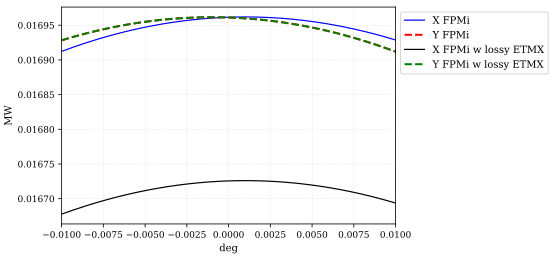

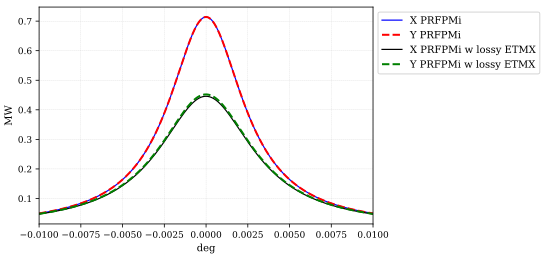

In [79]:
def CARMscanwDoff(k,title):
    kat = k.deepcopy()
    kat.IFO.POW_X.add_signal()
    kat.IFO.POW_Y.add_signal()
    DO = 10
    kat.ETMX.phi +=DO
    kat.ETMY.phi -=DO
    o=kat.IFO.CARM.scan(xlimits=[-1e-2,1e-2])
    plt.plot(o.x,o[kat.IFO.POW_X.name]/1e6,label='X {}'.format(title))
    plt.plot(o.x,o[kat.IFO.POW_Y.name]/1e6,label='Y {}'.format(title),ls='--',lw=2)
    plt.ylabel('MW')
    plt.xlabel('deg')
    plt.legend(loc=2,bbox_to_anchor=(1,1))

PRkat = ULbase.deepcopy()
PRkat.SRM.setRTL(0,1,0)

FPkat = PRkat.deepcopy()
FPkat.PRM.setRTL(0,1,0)

lossyPR = PRkat.deepcopy()
lossyPR.ETMX.L += 1e-4

lossyFP = FPkat.deepcopy()
lossyFP.ETMX.L += 1e-4

CARMscanwDoff(FPkat,'FPMi')
CARMscanwDoff(lossyFP,'FPMi w lossy ETMX')
plt.figure()
CARMscanwDoff(PRkat,'PRFPMi')
CARMscanwDoff(lossyPR,'PRFPMi w lossy ETMX')

for kk in [PRkat, lossyPR]:
    kk.IFO.POW_X.add_signal()
    kk.IFO.POW_Y.add_signal()
    kk.noxaxis=True
    o=kk.run()
    print((o[kat.IFO.POW_Y.name]-o[kat.IFO.POW_X.name])/o[kat.IFO.POW_Y.name]*100)

--------------
compare to Craig

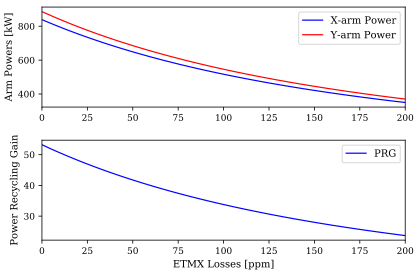

In [96]:
ETMX_Losses = np.linspace(0, 200e-6, 100)

kat = ULbase.deepcopy()
kat.IFO.POW_X.add_signal()
kat.IFO.POW_Y.add_signal()
kat.IFO.POW_BS.add_signal()
inputPower=float(kat.L0.P)
kat.ITMX.T = 0.015
kat.ITMY.T = 0.0142 

Xarm_powers = np.array([])
Yarm_powers = np.array([])
PRC_powers = np.array([])
PRGs = np.array([])

for LL in ETMX_Losses:
    kat2 = kat.deepcopy()
    kat2.ETMX.L = LL
    
    kat2.noxaxis=True
    out2 = kat2.run()
    
    Xarm_power = out2[kat.IFO.POW_X.name]
    Yarm_power = out2[kat.IFO.POW_Y.name]
    PRC_power = out2[kat.IFO.POW_BS.name]
    PRG = PRC_power/inputPower
    
    Xarm_powers = np.append(Xarm_powers, Xarm_power)
    Yarm_powers = np.append(Yarm_powers, Yarm_power)
    PRC_powers = np.append(PRC_powers, PRC_power)
    PRGs = np.append(PRGs, PRG)
    
kat2.noxaxis=True
out = kat2.run()

fig, (s1,s2) = plt.subplots(2)
# fig.patch.set_facecolor('xkcd:white')

p1, = s1.plot(ETMX_Losses*1e6, Xarm_powers*1e-3, label='X-arm Power')
p2, = s1.plot(ETMX_Losses*1e6, Yarm_powers*1e-3, label='Y-arm Power')
# s1.set_xlim(s1.get_xlim())
# s1.set_ylim(s1.get_ylim())

p3, = s2.plot(ETMX_Losses*1e6, PRGs, label='PRG')
# s2.set_xlim(s2.get_xlim())
# s2.set_ylim(s2.get_ylim())

s1.grid()
s2.grid()

s1.legend()
s2.legend()

s1.set_ylabel('Arm Powers [kW]')
s2.set_ylabel('Power Recycling Gain')
s2.set_xlabel('ETMX Losses [ppm]')

plt.tight_layout()


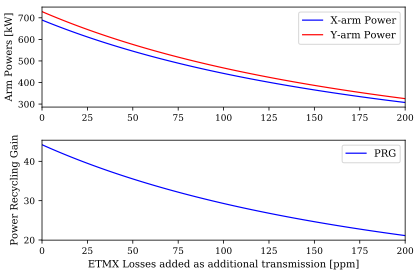

In [97]:
ETMX_Losses = np.linspace(0, 200e-6, 100)

kat = ULbase.deepcopy()
kat.IFO.POW_X.add_signal()
kat.IFO.POW_Y.add_signal()
kat.IFO.POW_BS.add_signal()
inputPower=float(kat.L0.P)
kat.ITMX.T = 0.015
kat.ITMY.T = 0.0142 

Xarm_powers = np.array([])
Yarm_powers = np.array([])
PRC_powers = np.array([])
PRGs = np.array([])

for LL in ETMX_Losses:
    kat2 = kat.deepcopy()
    kat2.ETMX.T += LL
    
    kat2.noxaxis=True
    out2 = kat2.run()
    
    Xarm_power = out2[kat.IFO.POW_X.name]
    Yarm_power = out2[kat.IFO.POW_Y.name]
    PRC_power = out2[kat.IFO.POW_BS.name]
    PRG = PRC_power/inputPower
    
    Xarm_powers = np.append(Xarm_powers, Xarm_power)
    Yarm_powers = np.append(Yarm_powers, Yarm_power)
    PRC_powers = np.append(PRC_powers, PRC_power)
    PRGs = np.append(PRGs, PRG)
    
kat2.noxaxis=True
out = kat2.run()

fig, (s1,s2) = plt.subplots(2)
# fig.patch.set_facecolor('xkcd:white')

p1, = s1.plot(ETMX_Losses*1e6, Xarm_powers*1e-3, label='X-arm Power')
p2, = s1.plot(ETMX_Losses*1e6, Yarm_powers*1e-3, label='Y-arm Power')
# s1.set_xlim(s1.get_xlim())
# s1.set_ylim(s1.get_ylim())

p3, = s2.plot(ETMX_Losses*1e6, PRGs, label='PRG')
# s2.set_xlim(s2.get_xlim())
# s2.set_ylim(s2.get_ylim())

s1.grid()
s2.grid()

s1.legend()
s2.legend()

s1.set_ylabel('Arm Powers [kW]')
s2.set_ylabel('Power Recycling Gain')
s2.set_xlabel('ETMX Losses added as additional transmission [ppm]')

plt.tight_layout()


Craig's original

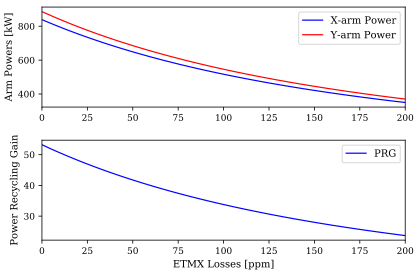

In [94]:
ETMX_Losses = np.linspace(0, 200e-6, 100)
ETMX_Trans = np.ones_like(ETMX_Losses) * kat.ETMX.T
ETMX_Refl = np.ones_like(ETMX_Losses) - ETMX_Trans - ETMX_Losses

kat2 = ULbase.deepcopy()
kat2.IFO.POW_X.add_signal()
kat2.IFO.POW_Y.add_signal()
kat2.IFO.POW_BS.add_signal()
inputPower=float(kat2.L0.P)
kat2.ITMX.T = 0.015
kat2.ITMY.T = 0.0142 

Xarm_powers = np.array([])
Yarm_powers = np.array([])
PRC_powers = np.array([])
PRGs = np.array([])

for loss, trans, refl in zip(ETMX_Losses, ETMX_Trans, ETMX_Refl):
    kat2.ETMX.setRTL(refl,trans,loss)
    
    kat2.noxaxis=True
    out2 = kat2.run()
    
    Xarm_power = out2[kat.IFO.POW_X.name]
    Yarm_power = out2[kat.IFO.POW_Y.name]
    PRC_power = out2[kat.IFO.POW_BS.name]
    PRG = PRC_power/inputPower
    
    Xarm_powers = np.append(Xarm_powers, Xarm_power)
    Yarm_powers = np.append(Yarm_powers, Yarm_power)
    PRC_powers = np.append(PRC_powers, PRC_power)
    PRGs = np.append(PRGs, PRG)
    
kat2.noxaxis=True
out = kat2.run()

fig, (s1,s2) = plt.subplots(2)
# fig.patch.set_facecolor('xkcd:white')

p1, = s1.plot(ETMX_Losses*1e6, Xarm_powers*1e-3, label='X-arm Power')
p2, = s1.plot(ETMX_Losses*1e6, Yarm_powers*1e-3, label='Y-arm Power')
# s1.set_xlim(s1.get_xlim())
# s1.set_ylim(s1.get_ylim())

p3, = s2.plot(ETMX_Losses*1e6, PRGs, label='PRG')
# s2.set_xlim(s2.get_xlim())
# s2.set_ylim(s2.get_ylim())

s1.grid()
s2.grid()

s1.legend()
s2.legend()

s1.set_ylabel('Arm Powers [kW]')
s2.set_ylabel('Power Recycling Gain')
s2.set_xlabel('ETMX Losses [ppm]')

plt.tight_layout()
